<a href="https://colab.research.google.com/github/BoonthichaSaejia/Data_Science/blob/master/Mui_Week3_DSE_ML_Pipeline_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Pipeline



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load data from google drive
!gdown --id 1ekwruBWltF4WisaY15R15sqWcNnY16i7
!unzip datasets.zip

Downloading...
From: https://drive.google.com/uc?id=1ekwruBWltF4WisaY15R15sqWcNnY16i7
To: /content/datasets.zip
100% 64.7k/64.7k [00:00<00:00, 23.3MB/s]
Archive:  datasets.zip
  inflating: news_sample.csv         
  inflating: titanic.csv             
  inflating: mushroom_data.csv       


# 1. Get data

In [ ]:
def getinitialfeature(df):
  initial = []
  for i in range(len(df)):
    fn = df['Name'].values[i]
    initial.append(fn.split(',')[1].split('.')[0].strip())
  df['initial'] = initial
  initialdummy = pd.get_dummies(df['initial'])
  return initialdummy

In [ ]:
def load_data():
  titanic_df = pd.read_csv('titanic.csv')
  train_df = titanic_df.iloc[0:712, :]
  test_df = titanic_df.iloc[712:, :]
  dat = pd.concat([train_df,test_df])
  idat = getinitialfeature(dat)
  dat = pd.concat([dat,idat],axis=1)
  train_df = dat.iloc[0:len(train_df)]
  test_df = dat.iloc[len(train_df):]
  return train_df, test_df

In [ ]:
train_df, test_df = load_data()

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             147
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           550
Embarked          1
initial           0
Capt              0
Col               0
Don               0
Dr                0
Jonkheer          0
Lady              0
Major             0
Master            0
Miss              0
Mlle              0
Mme               0
Mr                0
Mrs               0
Ms                0
Rev               0
Sir               0
the Countess      0
dtype: int64

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
count,712.000000,712.000000,712.000000,565.000000,712.000000,712.000000,712.000000,712.0,712.000000,712.000000,712.000000,712.0,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.0
mean,356.500000,0.390449,2.301966,30.030531,0.528090,0.382022,32.509538,0.0,0.002809,0.001404,0.007022,0.0,0.001404,0.002809,0.039326,0.217697,0.002809,0.001404,0.580056,0.134831,0.001404,0.005618,0.001404,0.0
std,205.680983,0.488194,0.838656,14.602635,1.064342,0.813122,48.672710,0.0,0.052963,0.037477,0.083564,0.0,0.037477,0.052963,0.194506,0.412970,0.052963,0.037477,0.493896,0.341784,0.037477,0.074795,0.037477,0.0
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,178.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,356.500000,0.000000,3.000000,28.000000,0.000000,0.000000,15.022900,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,534.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,712.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


# 2. Clean data

In [ ]:
train_df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             147
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           550
Embarked          1
initial           0
Capt              0
Col               0
Don               0
Dr                0
Jonkheer          0
Lady              0
Major             0
Master            0
Miss              0
Mlle              0
Mme               0
Mr                0
Mrs               0
Ms                0
Rev               0
Sir               0
the Countess      0
dtype: int64

In [ ]:
test_df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              30
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           137
Embarked          1
initial           0
Capt              0
Col               0
Don               0
Dr                0
Jonkheer          0
Lady              0
Major             0
Master            0
Miss              0
Mlle              0
Mme               0
Mr                0
Mrs               0
Ms                0
Rev               0
Sir               0
the Countess      0
dtype: int64

In [ ]:
train_df['Age'].mode()[0]

22.0

In [ ]:
train_df['Embarked'].mode()[0]

'S'

In [ ]:
def clean_data(df):
  for col in df.columns:
      mode = df[col].mode()[0]
      df[col] = df[col].fillna(mode)
  return df

In [ ]:
new_df = clean_data(train_df)

In [ ]:
new_df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
initial         0
Capt            0
Col             0
Don             0
Dr              0
Jonkheer        0
Lady            0
Major           0
Master          0
Miss            0
Mlle            0
Mme             0
Mr              0
Mrs             0
Ms              0
Rev             0
Sir             0
the Countess    0
dtype: int64

# 3. Extract features

In [ ]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
def split_data_label(df):
  label = df['Survived']
  data = df.drop('Survived', axis=1)
  return data, label

In [ ]:
train_data, train_label = split_data_label(clean_data(train_df))

In [ ]:
test_data, test_label = split_data_label(clean_data(test_df))

In [ ]:
def extract_feat(df):
  feat = df.copy()
  feat = feat.drop('PassengerId', axis=1)
  feat = feat._get_numeric_data()
  return feat

In [ ]:
train_feat = extract_feat(train_data)
test_feat = extract_feat(test_data)

In [ ]:
train_feat.head()

,Pclass,Age,SibSp,Parch,Fare,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,3,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,8.0500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_label

0      0
1      1
2      1
3      1
4      0
      ..
707    1
708    1
709    1
710    1
711    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
test_feat.head()

,Pclass,Age,SibSp,Parch,Fare,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
712,1,48.0,1,0,52.0000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
713,3,29.0,0,0,9.4833,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
714,2,52.0,0,0,13.0000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
715,3,19.0,0,0,7.6500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
716,1,38.0,0,0,227.5250,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# 4. Train model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [ ]:
X_train = train_feat.copy()
y_train = train_label.copy()
X_test = test_feat.copy()
y_test = test_label.copy()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def feature_scaling(train_feat, test_feat):
  scaler = MinMaxScaler()
  scaler.fit(train_feat)
  train_feat_scaled = scaler.transform(train_feat)
  test_feat_scaled = scaler.transform(test_feat)
  return train_feat_scaled, test_feat_scaled

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr =LogisticRegression()

In [ ]:
lgr = LogisticRegression()
lgr.fit(X_train_scaled, y_train)
prediction = lgr.predict(X_test_scaled)
print('Logistic Regression Score : ', accuracy_score(y_test, prediction))

Logistic Regression Score :  0.8603351955307262


## Support Vector Machine 


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
print('Support Vector Machine Score (without scaling) : ', accuracy_score(y_test, prediction))

Support Vector Machine Score (without scaling) :  0.7039106145251397


In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
prediction = svc.predict(X_test_scaled)
print('Support Vector Machine Score (with scaling) : ', accuracy_score(y_test, prediction))

Support Vector Machine Score (with scaling) :  0.8547486033519553


## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('K-Nearest Neighbors (without scaling) : ', accuracy_score(y_test, prediction))

K-Nearest Neighbors (without scaling) :  0.7206703910614525


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)
print('K-Nearest Neighbors (with scaling) : ', accuracy_score(y_test, prediction))

K-Nearest Neighbors (with scaling) :  0.8379888268156425


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=4)
dtc.fit(X_train_scaled, y_train)
prediction = dtc.predict(X_test_scaled)
print('Decision Tree : ', accuracy_score(y_test, prediction))

Decision Tree :  0.8491620111731844


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=10)
rfc.fit(X_train_scaled, y_train)
prediction= rfc.predict(X_test_scaled)
print('Random Forest Classifier :', accuracy_score(y_test, prediction))

Random Forest Classifier : 0.8324022346368715


## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gdc = GradientBoostingClassifier(random_state=0, max_depth=4, n_estimators=50, learning_rate=0.1)
gdc.fit(X_train_scaled, y_train)
prediction= gdc.predict(X_test_scaled)
print('Gradient Boosting Classifier :', accuracy_score(y_test, prediction))

Gradient Boosting Classifier : 0.8491620111731844


## Choose Logistic Regression model  




In [ ]:
def train_model(feat, label):
  model = LogisticRegression()
  model.fit(feat, label)
  return model

In [ ]:
model = train_model(X_train_scaled, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.coef_

array([[-1.86685339, -1.12338865, -1.96821356, -1.18685158,  0.43129241,
         0.        , -0.3024865 , -0.63349784, -0.56659953,  0.        ,
         0.25322871, -0.34325578,  0.84138521,  1.05580688,  0.3002547 ,
         0.16710821, -1.69361624,  1.39625659,  0.32552546, -1.05246704,
         0.25314861,  0.        ]])

In [ ]:
model.intercept_

array([1.71173237])

# 5. Evaluate model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
def eval_acc(prediction, actual):
  acc = sum(prediction == actual) / len(actual)
  return acc

In [ ]:
prediction = model.predict(X_test_scaled)
print(eval_acc(prediction, y_test))
print(accuracy_score(y_test, prediction))

0.8603351955307262
0.8603351955307262


In [ ]:
print('accuracy score: ', accuracy_score(y_test, prediction))
print('precision score: ', precision_score(y_test, prediction))
print('recall score: ', recall_score(y_test, prediction))
print('f1 score: ', f1_score(y_test, prediction))
print('\nClassification Report\n', classification_report(y_test, prediction))
print('\nConfusion Matrix\n', confusion_matrix(y_test, prediction))

accuracy score:  0.8603351955307262
precision score:  0.8095238095238095
recall score:  0.796875
f1 score:  0.8031496062992126

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       115
           1       0.81      0.80      0.80        64

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179


Confusion Matrix
 [[103  12]
 [ 13  51]]


In [ ]:
columns_ = [np.array(['Predicted', 'Predicted']), np.array(['0', '1'])]
indexs_ = [np.array(['Actual', 'Actual']), 
           np.array(['0', '1'])]
pd.DataFrame(confusion_matrix(y_test, prediction), columns=columns_, index=indexs_)

Predicted    
                 0   1
Actual 0       103  12
       1        13  51

In [ ]:
print('precision score: ', 51/(51+12))
print('recall score: ', 51/(51+13))
print('f1 score: ', 2*((51/(51+12))*(51/(51+13)))/((51/(51+12))+(51/(51+13))))

precision score:  0.8095238095238095
recall score:  0.796875
f1 score:  0.8031496062992126


# 6. Run pipeline

In [ ]:
def run_pipeline():
  # Get data
  train_df, test_df = load_data()

  # Clean & split data
  train_data, train_label = split_data_label(clean_data(train_df))
  test_data, test_label = split_data_label(clean_data(test_df))

  # Extract feature
  train_feat = extract_feat(train_data)
  test_feat = extract_feat(test_data)

  # Feature Scaling
  train_feat_scaled, test_feat_scaled = feature_scaling(train_feat, test_feat)
  
  # Train model
  model = train_model(train_feat_scaled, train_label)

  # Prediction
  prediction = model.predict(test_feat_scaled)

  # Evaluation
  acc = eval_acc(prediction, test_label)

  return acc

In [ ]:
run_pipeline()

0.8603351955307262

#ETC.

###Train, Validation and Test

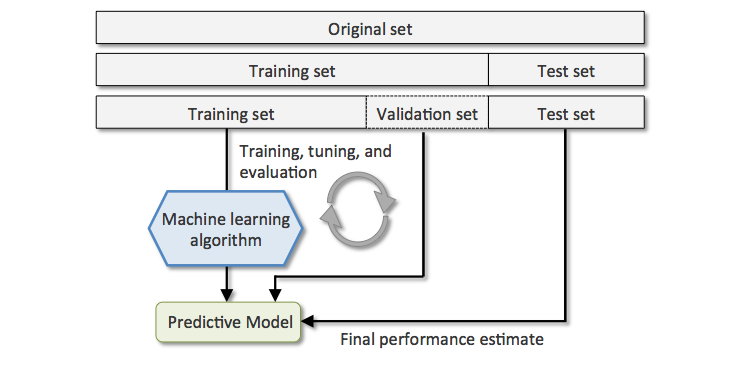

### Cross-Validation

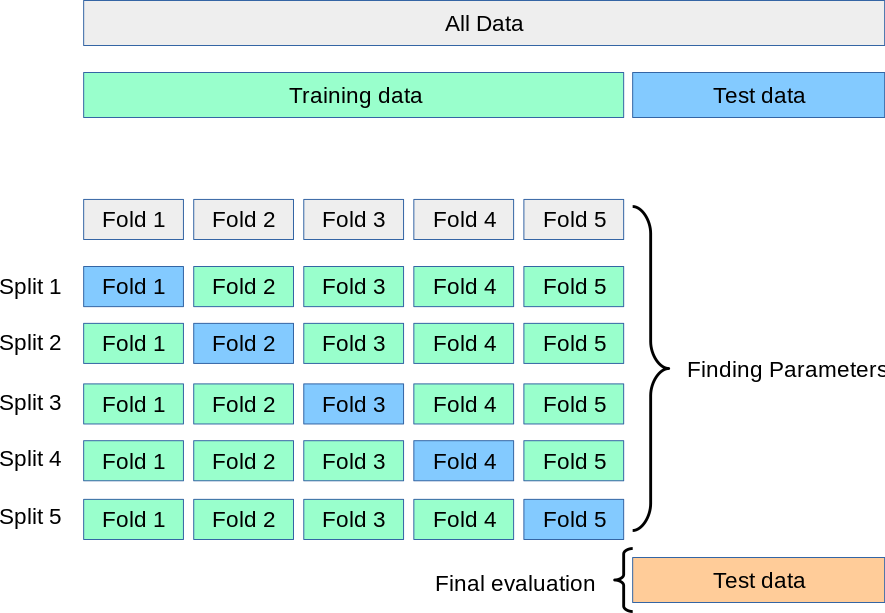

source: https://scikit-learn.org/stable/modules/cross_validation.html

### Parameter vs. Hyperparameter

In [ ]:
#Hyperparameter
model_example = LogisticRegression(random_state=0, penalty='l2', max_iter=100)
model_example.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Parameter
print(model_example.coef_)
print(model_example.intercept_)

[[-1.86685339 -1.12338865 -1.96821356 -1.18685158  0.43129241  0.
  -0.3024865  -0.63349784 -0.56659953  0.          0.25322871 -0.34325578
   0.84138521  1.05580688  0.3002547   0.16710821 -1.69361624  1.39625659
   0.32552546 -1.05246704  0.25314861  0.        ]]
[1.71173237]
